In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [26]:
dataset = tfds.load('horses_or_humans', split=['train'], as_supervised=True)

array = np.vstack(tfds.as_numpy(dataset[0]))
X = np.array(list(map(lambda x: x[0], array)))
y = np.array(list(map(lambda x: x[1], array)))

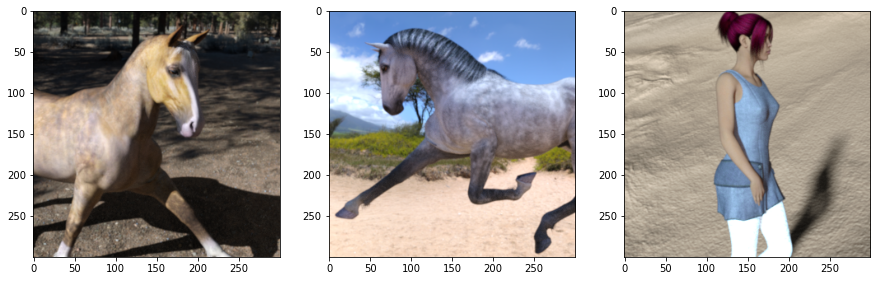

In [52]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))
ax1.imshow(X[0])
ax2.imshow(X[50])
ax3.imshow(X[100])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=133, shuffle=True)

y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten

restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(300,300,3))

for layer in restnet.layers:
    layer.trainable = False

model = Sequential()
model.add(restnet)
model.add(Flatten())
model.add(Dense(16, activation='relu', input_dim=(300,300,3)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 10, 10, 2048)      23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                3276816   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 26,864,545
Trainable params: 3,276,833
Non-trainable params: 23,587,712
_________________________________________________________________


In [41]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    x=X_train,
    y=y_train,
    epochs=5,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/5
22/22 [==============================] - 275s 12s/step - loss: 0.0948 - accuracy: 0.9680 - val_loss: 0.0227 - val_accuracy: 0.9971
Epoch 2/5
22/22 [==============================] - 238s 11s/step - loss: 0.0354 - accuracy: 0.9985 - val_loss: 2.8600e-17 - val_accuracy: 1.0000
Epoch 3/5
22/22 [==============================] - 238s 11s/step - loss: 2.4464e-18 - accuracy: 1.0000 - val_loss: 6.9058e-10 - val_accuracy: 1.0000
Epoch 4/5
22/22 [==============================] - 239s 11s/step - loss: 1.7217e-15 - accuracy: 1.0000 - val_loss: 5.1168e-09 - val_accuracy: 1.0000
Epoch 5/5
22/22 [==============================] - 203s 9s/step - loss: 2.2331e-15 - accuracy: 1.0000 - val_loss: 6.4143e-09 - val_accuracy: 1.0000


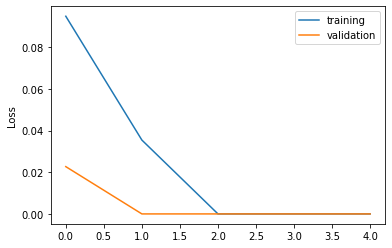

In [64]:
plt.figure()
plt.plot(range(5), history.history['loss'])
plt.plot(range(5), history.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['training','validation'])

In [ ]:
predict = model.predict(X_test)

Note: 0 is horse and 1 is human

Figure 1 is: [1.] 

Figure 2 is: [0.]


Text(0.5, 1.0, 'Figure 2')

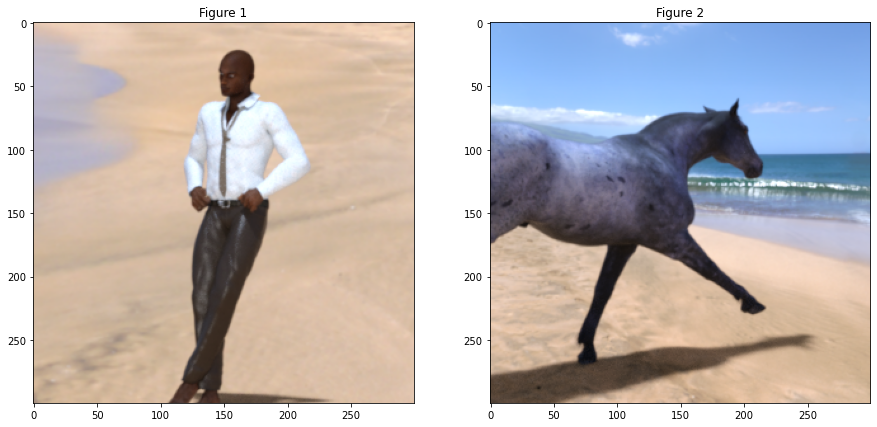

In [57]:
print('Note: 0 is horse and 1 is human\n')
print('Figure 1 is:', predict[50], '\n')
print('Figure 2 is:', predict[100])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(X_test[50])
ax1.set_title("Figure 1")
ax2.imshow(X_test[100])
ax2.set_title('Figure 2')

In [58]:
m = tf.keras.metrics.Accuracy()
m.update_state(predict, y_test)
m.result().numpy()

0.99705017